known: all data + parameter  
unknown:   
result_record: https://outlookuga-my.sharepoint.com/:x:/g/personal/yq88347_uga_edu/EZabROaVeP9DoeRC_CEY-QABRXk6YPmp_oNhKu0h8MM0uQ

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import tensorflow as tf
import models_tf as models

In [2]:
# data = sio.loadmat("test.mat")
# data = sio.loadmat("data.mat")
data = sio.loadmat("../../data/data_2k_points.mat")
c0 = data["IC"]
t = data["t"]
c_ref = data["y"]

t_train = t

# scale = np.array(
#     [10, 1, 100, 100, 0.001, 10, 0.1, 1000]
# ).reshape([-1])
scale = np.array(
    [10, 1, 100, 100, 0.0001, 10, 0.1, 1000]
).reshape([-1])
c_ref = c_ref / scale
c0 = c0 / scale

In [3]:
# time span
np.max(t)

100.0

In [4]:
len(t)

2000

In [5]:
np.max(data["y"], axis=0)

array([2.99999999e+01, 3.54115121e+00, 8.57923329e+02, 1.00000000e+03,
       1.13698673e-03, 3.83874944e+01, 8.68819961e-01, 2.16923077e+03])

In [6]:
model = models.PINN(
    c0=c0,
    output_dim=8,
    scale=scale,
    units=100, 
    activation=tf.tanh,
    eps=1e-4,
)

In [7]:
t_ode = t_train[::10]
t_u = t_train
u = c_ref
loss, ode_loss, data_loss, min_loss = model.train(t_ode, t_u, u, niter=150000)

0 61904120.0 619041200000.0 2.746663
1000 10.281431 93995.16 0.8819158
2000 2.3064022 16366.195 0.6697827
3000 123752.266 1237515600.0 0.70009255
4000 6.735158 62112.68 0.52389014
5000 3.9898913 34927.207 0.49717078
6000 2.751394 22811.197 0.47027454
7000 1.8994627 14589.9375 0.4404691
8000 2.0602787 16408.29 0.41944987
9000 32.995975 325774.25 0.4185539
10000 1.1058633 7181.5264 0.38771075
11000 1.0329515 6528.5645 0.3800951
12000 0.9825239 5552.868 0.4272371
13000 0.68621606 2847.5078 0.4014653
14000 0.6036786 2190.2263 0.38465592
15000 0.5331317 1307.8176 0.40234995
16000 0.4123763 416.83148 0.37069318
17000 75.10043 747482.06 0.35222748
18000 0.7280493 4029.0906 0.32514024
19000 0.32586786 78.920425 0.31797582
20000 0.30395198 26.251135 0.30132687
21000 0.2994071 38.65225 0.29554188
22000 0.7104085 995.84607 0.6108239
23000 0.5235853 104.809616 0.5131044
24000 0.43479943 15.689898 0.43323043
25000 0.5344303 1595.1283 0.37491748
26000 8.756729 84225.9 0.33414012
27000 0.37117958 569

In [8]:
min_loss

1.3525515e-06

In [9]:
model.restore()
c_pred = model.call(
    tf.constant(t_train, tf.float32),
)

In [10]:
L2 = np.sqrt(np.sum((c_pred - c_ref) ** 2, axis=0) / np.sum(c_ref ** 2, axis=0))

In [11]:
L2

array([0.00030012, 0.00144752, 0.00155692, 0.00044187, 0.00139163,
       0.0029402 , 0.00111428, 0.00038021])

In [12]:
# k1 = 2.82
print(tf.math.exp(model.log_k1))

tf.Tensor(1.0, shape=(), dtype=float32)


In [13]:
# k_apc = 0.0014
print(tf.math.exp(model.log_k_apc))

tf.Tensor(1.0, shape=(), dtype=float32)


In [14]:
# k8 = 0.00001
print(tf.math.exp(model.log_k8))

tf.Tensor(9.989594e-06, shape=(), dtype=float32)


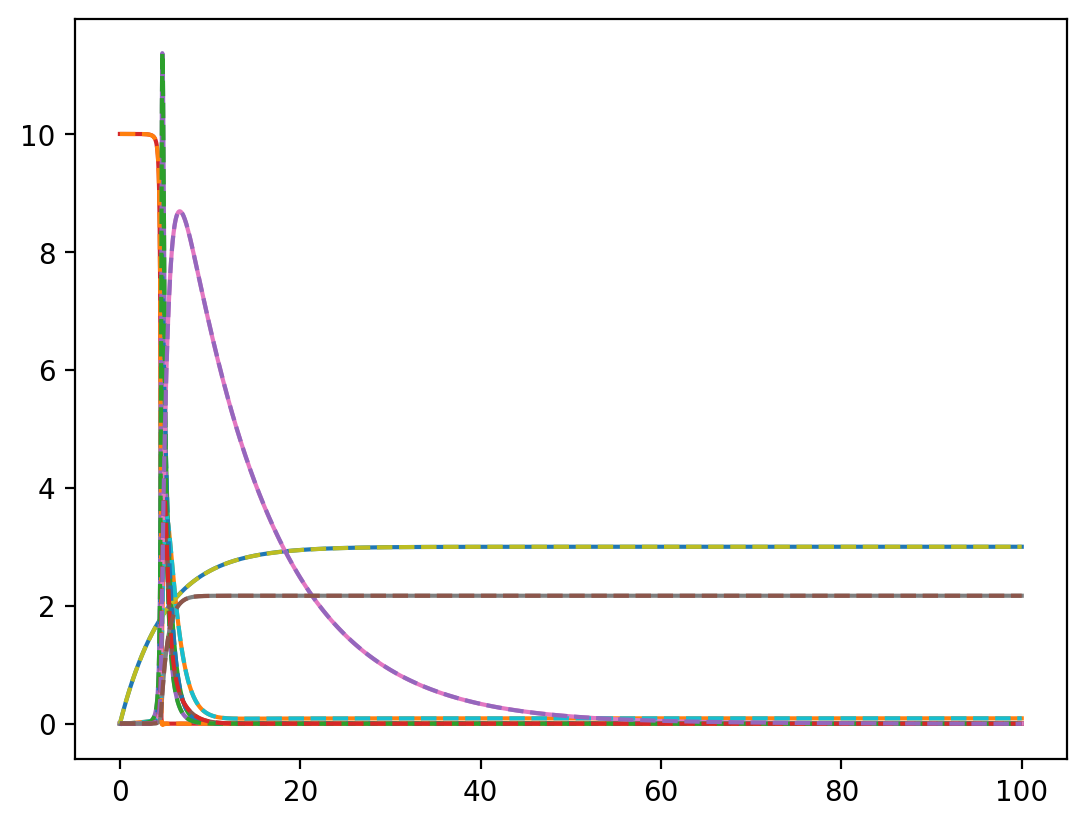

In [15]:
plt.figure(dpi=200)
plt.plot(t_train, c_ref, "-", label="reference")
# plt.plot(t_train, y_train, '.', label="train")
plt.plot(t_train, c_pred, "--", label="prediction")
# plt.legend()
plt.show()

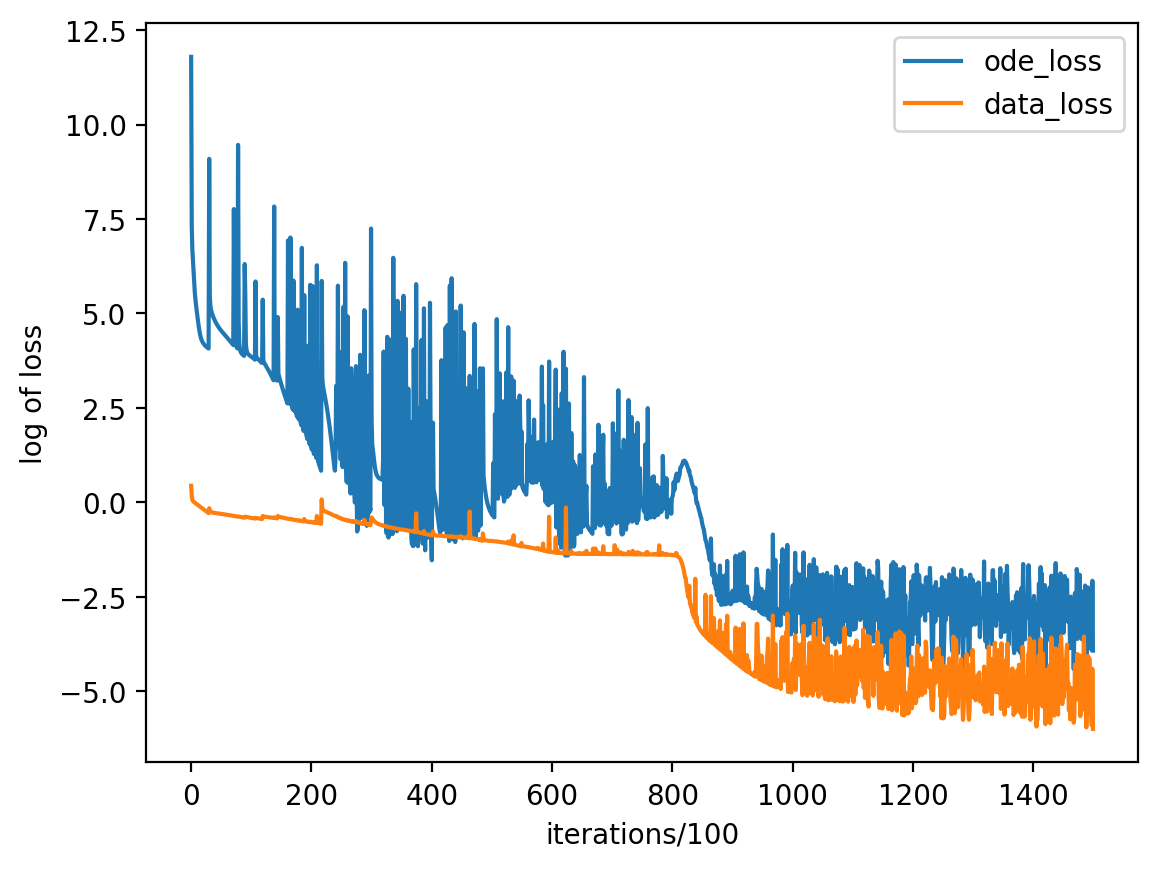

In [16]:
plt.figure(dpi=200)
plt.plot(np.log10(ode_loss)[::100], "-", label="ode_loss")
plt.plot(np.log10(data_loss)[::100], "-", label="data_loss")
# plt.plot(np.log(loss), "-", label="loss")
plt.xlabel('iterations/100')
plt.ylabel('log of loss')
plt.legend()
plt.show()

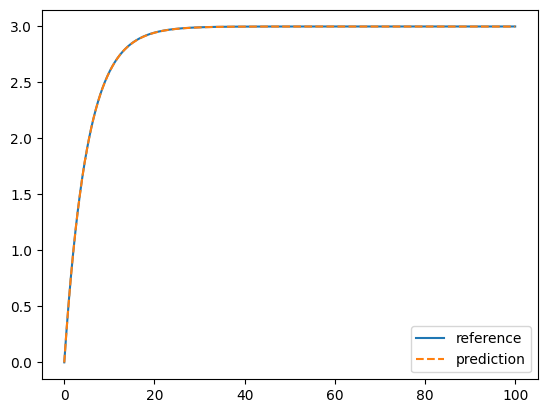

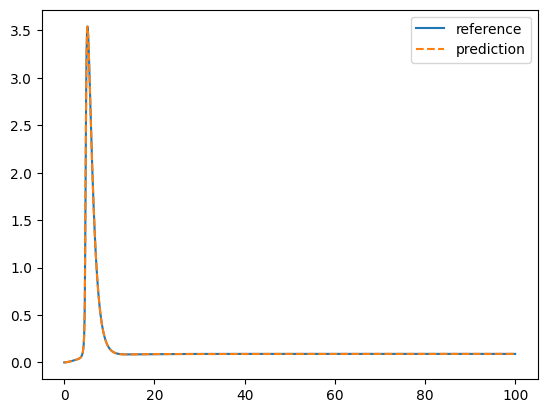

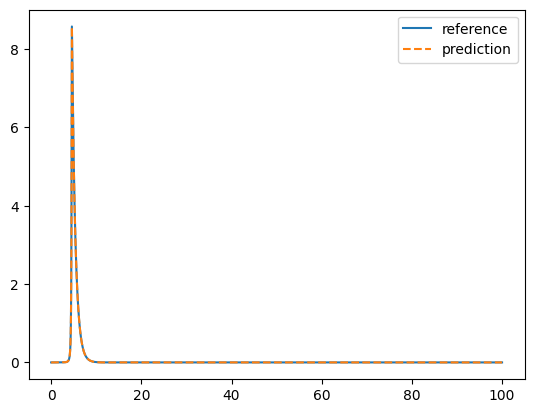

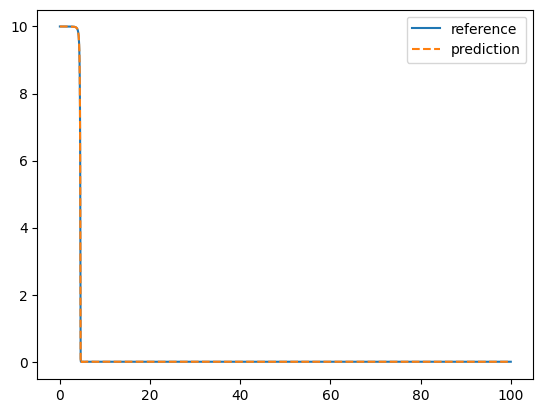

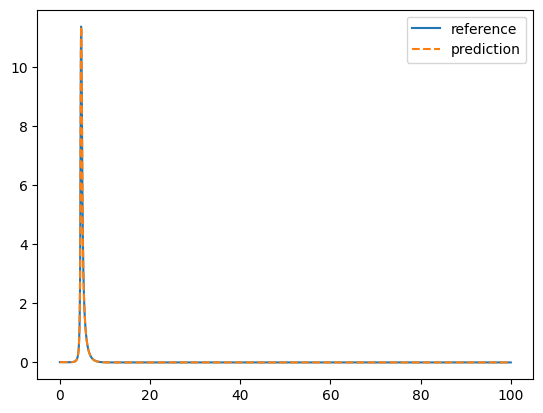

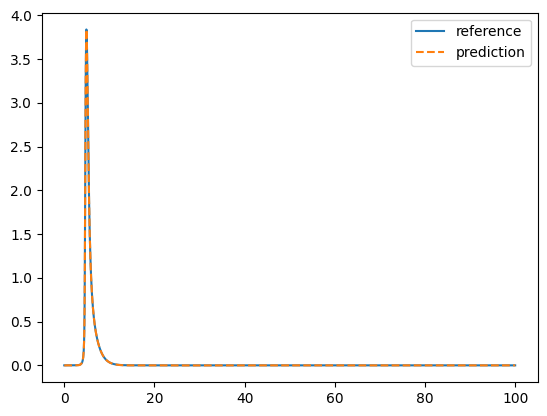

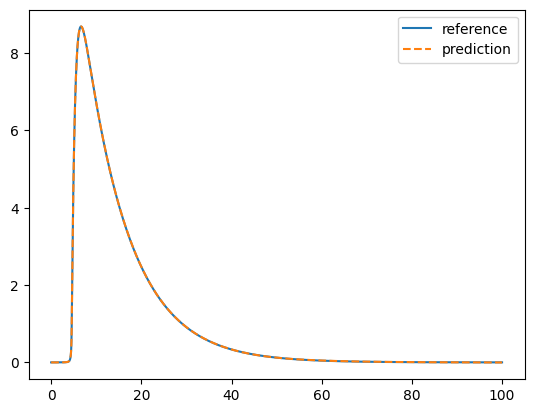

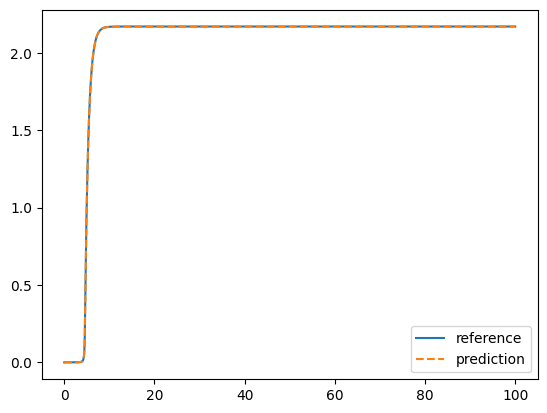

In [17]:
plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 0:1], "-", label="reference")
plt.plot(t_train, c_pred[:, 0:1], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 1:2], "-", label="reference")
plt.plot(t_train, c_pred[:, 1:2], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 2:3], "-", label="reference")
plt.plot(t_train, c_pred[:, 2:3], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 3:4], "-", label="reference")
plt.plot(t_train, c_pred[:, 3:4], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 4:5], "-", label="reference")
plt.plot(t_train, c_pred[:, 4:5], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 5:6], "-", label="reference")
plt.plot(t_train, c_pred[:, 5:6], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 6:7], "-", label="reference")
plt.plot(t_train, c_pred[:, 6:7], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 7:8], "-", label="reference")
plt.plot(t_train, c_pred[:, 7:8], "--", label="prediction")
plt.legend()
plt.show()